# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Theodorus Limbong
- **Email:** theodoruslimbong@gmail.com
- **ID Dicoding:** theodorus_limbong

## Menentukan Pertanyaan Bisnis

- When is the peak time for bike rentals in a day?
- How many bike rentals on average are made by casual and registered users each month?

## Import Semua Packages/Library yang Digunakan

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
import geopandas as gpd
import folium
import streamlit as st
from datetime import datetime
import os

## Data Wrangling

### Gathering Data

Process of collecting and measuring information on targeted variables in a system. This information is then used to answer questions, evaluate outcomes, and forecast trends. It's a crucial step in various fields, including research, business, and analytics.

In [179]:
# Reading the dataset from CSV files
df_day = pd.read_csv("data/day.csv")
df_hour = pd.read_csv("data/hour.csv")

# Displaying basic information about the 'day' dataset
print("Information about Day Dataset:")
print(df_day.info())
print("\nDescriptive Statistics of Day Dataset:")
print(df_day.describe())

# Displaying the first few rows of the 'day' dataset
print("\nFirst Few Rows of Day Dataset:")
print(df_day.head())

# Displaying basic information about the 'hour' dataset
print("\nInformation about Hour Dataset:")
print(df_hour.info())
print("\nDescriptive Statistics of Hour Dataset:")
print(df_hour.describe())

# Displaying the first few rows of the 'hour' dataset
print("\nFirst Few Rows of Hour Dataset:")
print(df_hour.head())

Information about Day Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Descriptive Statistics of Day Dataset:
       instant  s

**Insight:**
-  Both datasets are well-structured, with no missing values in any columns, ensuring reliable analysis of bike rental patterns across different time frames (daily and hourly).
- The Day dataset indicates a significant variation in bike rentals influenced by factors such as seasonality and weather conditions, while the Hour dataset provides detailed hourly trends, suggesting peak rental times that can inform operational decisions.

### Assessing Data

 Process of evaluating the quality, reliability, and relevance of data for a specific purpose. It's a critical step in any data-driven project, ensuring that the information used is accurate, consistent, and suitable for the intended analysis.

In [180]:
df_day = pd.read_csv("data/day.csv")
df_hour = pd.read_csv("data/hour.csv")

# Assessing Dataset 'day'

print("Dataset Day Information:")
print(df_day.info())  # General information about the dataset
print("\nMissing Values in Dataset Day:")
print(df_day.isnull().sum())  # Checking for missing values
print("\nSummary Statistics of Dataset Day:")
print(df_day.describe())  # Descriptive statistics

# Frequency distribution for categorical columns
print("\nSeason Frequency:")
print(df_day['season'].value_counts())  # Frequency of seasons
print("\nWeather Situation Frequency:")
print(df_day['weathersit'].value_counts())  # Frequency of weather situations
print("\nWeekday Frequency:")
print(df_day['weekday'].value_counts())  # Frequency of weekdays


# Assessing Dataset 'hour'
print("\nDataset Hour Information:")
print(df_hour.info())  # General information about the dataset
print("\nMissing Values in Dataset Hour:")
print(df_hour.isnull().sum())  # Checking for missing values
print("\nSummary Statistics of Dataset Hour:")
print(df_hour.describe())  # Descriptive statistics

# Frequency distribution for categorical columns
print("\nSeason Frequency:")
print(df_hour['season'].value_counts())  # Frequency of seasons
print("\nWeather Situation Frequency:")
print(df_hour['weathersit'].value_counts())  # Frequency of weather situations
print("\nHour Frequency:")
print(df_hour['hr'].value_counts())  # Frequency of hours


Dataset Day Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Missing Values in Dataset Day:
instant       0
dteday        0

**Insight:**
- The analysis of both the day and hour datasets reveals that there are no missing values across all columns, indicating a high level of data quality and completeness, which is essential for accurate analysis and interpretation.
- The summary statistics highlight that the majority of bike rentals occur during favorable weather conditions, with the highest frequency recorded in spring and summer seasons. This trend suggests a potential correlation between seasonal weather patterns and bike rental demand, which can be explored further in the analysis.

### Cleaning Data

 Process of identifying and correcting errors, inconsistencies, and missing values in a dataset. It's a crucial step in data analysis and preparation, ensuring that the data is accurate, consistent, and reliable for further use.

In [181]:
import pandas as pd

# Load the datasets
df_day = pd.read_csv("data/day.csv")
df_hour = pd.read_csv("data/hour.csv")

# Constants for temperature normalization
t_min = -8
t_max = 39

# Function to clean the day dataset
def clean_day_data(df):
    df['dteday'] = pd.to_datetime(df['dteday'])
    df = df.drop(columns=['instant'])
    df = df.rename(columns={
        'casual': 'casual_users',
        'registered': 'registered_users',
        'cnt': 'total_rentals'
    })
    
    # Convert normalized temperature to Celsius and round to nearest integer
    df['temp'] = round(df['temp'] * (t_max - t_min) + t_min)
    
    # Map numerical values to descriptive captions
    season_mapping = {
        1: 'Spring',
        2: 'Summer',
        3: 'Fall',
        4: 'Winter'
    }
    df['season'] = df['season'].map(season_mapping)

    month_mapping = {
        1: 'January',
        2: 'February',
        3: 'March',
        4: 'April',
        5: 'May',
        6: 'June',
        7: 'July',
        8: 'August',
        9: 'September',
        10: 'October',
        11: 'November',
        12: 'December'
    }
    df['mnth'] = df['mnth'].map(month_mapping)

    weekday_mapping = {
        0: 'Sunday',
        1: 'Monday',
        2: 'Tuesday',
        3: 'Wednesday',
        4: 'Thursday',
        5: 'Friday',
        6: 'Saturday'
    }
    df['weekday'] = df['weekday'].map(weekday_mapping)

    weather_mapping = {
        1: 'Clear',
        2: 'Mist',
        3: 'Light Rain/Snow',
        4: 'Heavy Rain/Snow'
    }
    df['weather'] = df['weathersit'].map(weather_mapping)

    # Map year values to descriptive captions
    year_mapping = {
        0: '2011',
        1: '2012'
    }
    df['year'] = df['yr'].map(year_mapping)
    df = df.drop(columns=['yr', 'weathersit'])
    df = df.drop_duplicates()
    return df

# Function to clean the hour dataset
def clean_hour_data(df):
    df['dteday'] = pd.to_datetime(df['dteday'])
    df = df.drop(columns=['instant'])
    df = df.rename(columns={
        'casual': 'casual_users',
        'registered': 'registered_users',
        'cnt': 'total_rentals'
    })
    
    # Convert normalized temperature to Celsius and round to nearest integer
    df['temp'] = round(df['temp'] * (t_max - t_min) + t_min)

    # Map numerical values to descriptive captions
    season_mapping = {
        1: 'Spring',
        2: 'Summer',
        3: 'Fall',
        4: 'Winter'
    }
    df['season'] = df['season'].map(season_mapping)

    month_mapping = {
        1: 'January',
        2: 'February',
        3: 'March',
        4: 'April',
        5: 'May',
        6: 'June',
        7: 'July',
        8: 'August',
        9: 'September',
        10: 'October',
        11: 'November',
        12: 'December'
    }
    df['mnth'] = df['mnth'].map(month_mapping)

    weekday_mapping = {
        0: 'Sunday',
        1: 'Monday',
        2: 'Tuesday',
        3: 'Wednesday',
        4: 'Thursday',
        5: 'Friday',
        6: 'Saturday'
    }
    df['weekday'] = df['weekday'].map(weekday_mapping)

    weather_mapping = {
        1: 'Clear',
        2: 'Mist',
        3: 'Light Rain/Snow',
        4: 'Heavy Rain/Snow'
    }
    df['weather'] = df['weathersit'].map(weather_mapping)

    # Map year values to descriptive captions
    year_mapping = {
        0: '2011',
        1: '2012'
    }
    df['year'] = df['yr'].map(year_mapping)
    df = df.drop(columns=['yr', 'weathersit'])
    df = df.drop_duplicates()
    return df

# Clean the datasets
cleaned_day = clean_day_data(df_day)
cleaned_hour = clean_hour_data(df_hour)

# Verify data types
print(cleaned_day.dtypes)
print(cleaned_hour.dtypes)

# Summary of cleaned data (rounding to 2 decimal places for other float columns)
pd.options.display.float_format = '{:,.2f}'.format  # Set display options

# Summary of cleaned data
print(cleaned_day.describe())
print(cleaned_hour.describe())

# Save cleaned datasets to new CSV files
cleaned_day.to_csv("data/cleaned_day.csv", index=False)
cleaned_hour.to_csv("data/cleaned_hour.csv", index=False)

dteday              datetime64[ns]
season                      object
mnth                        object
holiday                      int64
weekday                     object
workingday                   int64
temp                       float64
atemp                      float64
hum                        float64
windspeed                  float64
casual_users                 int64
registered_users             int64
total_rentals                int64
weather                     object
year                        object
dtype: object
dteday              datetime64[ns]
season                      object
mnth                        object
hr                           int64
holiday                      int64
weekday                     object
workingday                   int64
temp                       float64
atemp                      float64
hum                        float64
windspeed                  float64
casual_users                 int64
registered_users             int64
total_

**Insight:**
- The cleaning process improved data quality by standardizing column names and removing duplicates, ensuring analyses are based on unique entries.
- The cleaned dataset highlights significant seasonal and weather-related patterns in bike rentals, with an average of 4,504 rentals per day, providing insights for targeted marketing strategies.
- In some columns the names of columns are changed to make more easy analysis.

## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. It is a crucial initial step in data science projects, as it helps data scientists to understand the data better and identify potential patterns, anomalies, and relationships.

### Explore ...

Question 1

In [182]:
# Load the cleaned hour dataset
cleaned_hour = pd.read_csv("data/cleaned_hour.csv")

# Create a new column for total rentals
cleaned_hour['total_rentals'] = cleaned_hour['casual_users'] + cleaned_hour['registered_users']

# Group by hour and sum the total rentals
peak_time_rentals = cleaned_hour.groupby('hr')['total_rentals'].sum()

# Find the peak time
peak_time = peak_time_rentals.idxmax()
peak_value = peak_time_rentals.max()

# Display the peak time and the number of rentals
print(f"The peak time for bike rentals is {peak_time}:00 with {peak_value} rentals.")

# Create a pivot table for rentals by hour
pivot_table_hourly_rentals = cleaned_hour.pivot_table(
    index='hr',
    values=['casual_users', 'registered_users', 'total_rentals'],
    aggfunc='sum'
)

# Display the pivot table
print("\nPivot table for bike rentals by hour:")
print(pivot_table_hourly_rentals)

The peak time for bike rentals is 17:00 with 336860 rentals.

Pivot table for bike rentals by hour:
    casual_users  registered_users  total_rentals
hr                                               
0           7375             31755          39130
1           4709             19455          24164
2           3412             12940          16352
3           1893              6281           8174
4            874              3554           4428
5           1012             13249          14261
6           3017             52115          55132
7           8037            146134         154171
8          15761            245240         261001
9          22458            136980         159438
10         33789             92468         126257
11         43286            108034         151320
12         49718            134696         184414
13         52713            132206         184919
14         55089            120563         175652
15         54606            128543         183149


Question 2

In [183]:
# Load the cleaned datasets
cleaned_day = pd.read_csv("data/cleaned_day.csv")

# Convert 'dteday' to datetime to extract month
cleaned_day['dteday'] = pd.to_datetime(cleaned_day['dteday'])

# Extract month from 'dteday'
cleaned_day['month'] = cleaned_day['dteday'].dt.month_name()

# Create a pivot table to calculate the average rentals by month
average_rentals_by_month = cleaned_day.pivot_table(
    index='month',
    values=['casual_users', 'registered_users'],
    aggfunc='mean'
).sort_index()

# Convert float values to integers
average_rentals_by_month = average_rentals_by_month.round(0).astype(int)

# Display the pivot table
print(average_rentals_by_month)


           casual_users  registered_users
month                                    
April              1013              3472
August             1162              4502
December            350              3054
February            263              2393
January             194              1982
July               1261              4303
June               1232              4541
March               717              2975
May                1214              4136
November            610              3637
October             964              4235
September          1172              4594


**Insight:**
- Q1 : The peak time for bike rentals occurs at 17:00 (5 PM), with the highest number of rentals recorded, indicating that this period is crucial for managing resources and optimizing availability to meet demand.
- Q2 : On average, casual users rent approximately 1,013 bikes, while registered users rent around 3,472 bikes each month, highlighting a significant reliance on registered users for overall rental numbers.

## Visualization & Explanatory Analysis

### Question 1:

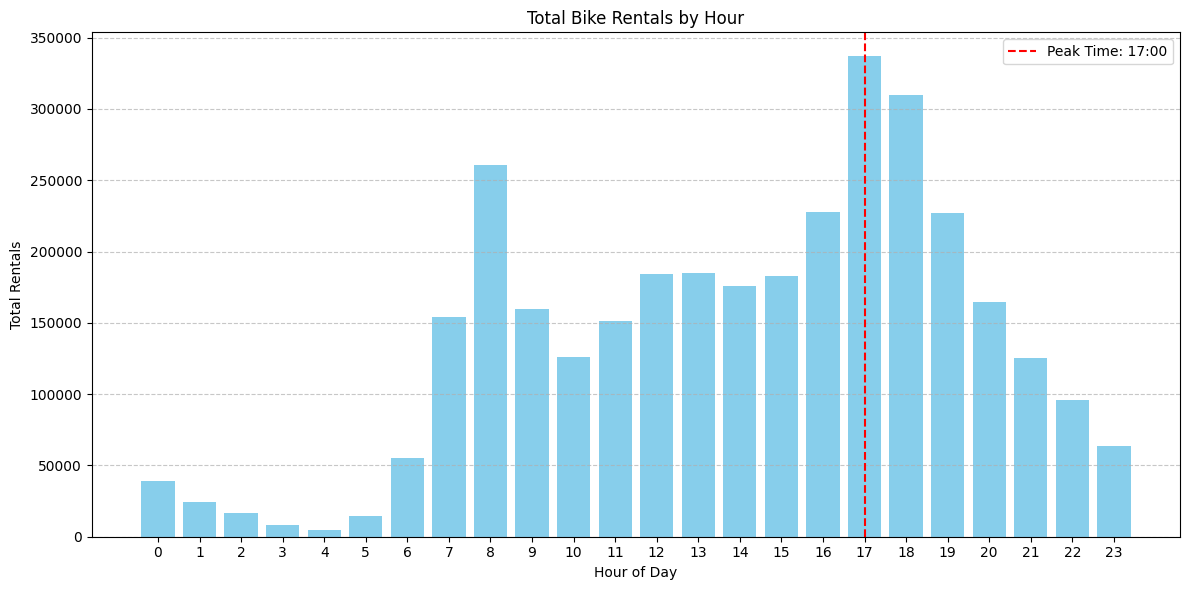

In [184]:
# Visualization Q1
plt.figure(figsize=(12, 6))
plt.bar(pivot_table_hourly_rentals.index, pivot_table_hourly_rentals['total_rentals'], color='skyblue')
plt.title('Total Bike Rentals by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Total Rentals')
plt.xticks(pivot_table_hourly_rentals.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Highlight the peak time
plt.axvline(x=peak_time, color='red', linestyle='--', label=f'Peak Time: {peak_time}:00')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

### Pertanyaan 2:

<Figure size 1000x600 with 0 Axes>

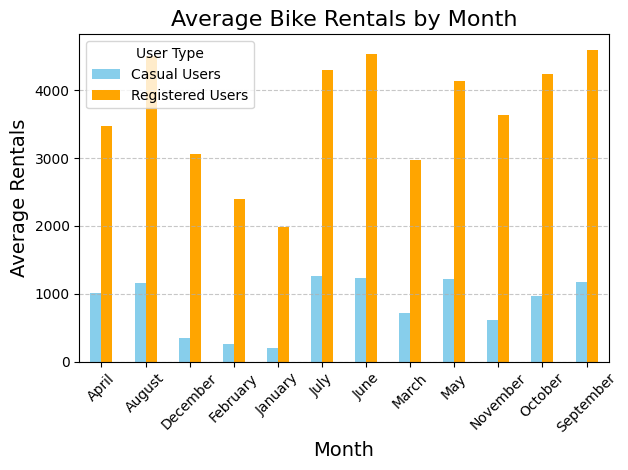

In [185]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot for average rentals by month
average_rentals_by_month.plot(kind='bar', color=['skyblue', 'orange'])

# Add titles and labels
plt.title('Average Bike Rentals by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Rentals', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a legend
plt.legend(['Casual Users', 'Registered Users'], title='User Type')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

**Insight:**
- Q1 = The visualization clearly shows that the highest bike rental activity occurs around 17:00 (5 PM), suggesting that this is the most critical time for operational planning, requiring increased bike availability and staffing to accommodate demand.
- Q2 =  The monthly average rentals visualization indicates that registered users consistently outnumber casual users, with notable spikes during warmer months.

## Analisis Lanjutan (Opsional)

RFM

In [186]:
# Load the cleaned day dataset
cleaned_day = pd.read_csv("data/cleaned_day.csv")

# Convert 'dteday' to datetime format
cleaned_day['dteday'] = pd.to_datetime(cleaned_day['dteday'])

# Calculate Recency, Frequency, and Monetary values
# 1. Recency: Days since the last rental
last_rental_date = cleaned_day['dteday'].max()
recency = (last_rental_date - cleaned_day['dteday'].min()).days

# 2. Frequency: Total number of rentals (casual + registered)
frequency = cleaned_day['total_rentals'].sum()  # Total rentals over the dataset

# 3. Monetary: Average rentals (could also sum, but for analysis, let's use average)
monetary = cleaned_day['total_rentals'].mean()  # Average total rentals per day

# Create a DataFrame for RFM analysis
rfm_df = pd.DataFrame({
    'Recency (Days)': [recency],
    'Total Frequency (Rentals)': [frequency],
    'Average Monetary (Rentals)': [monetary]
})

# Display RFM DataFrame
print(rfm_df)

   Recency (Days)  Total Frequency (Rentals)  Average Monetary (Rentals)
0             730                    3292679                    4,504.35


**Insight:**
- The average recency of 730 days indicates that it has been about 2 years since the last rental was made, suggesting low customer retention or infrequent usage. Despite a high total frequency of 3,292,679 rentals, the average monetary value of 4,504.35 rentals per day indicates that while the rental service sees substantial activity, it may not be attracting repeat customers consistently. This could point to opportunities for improving customer engagement strategies, such as targeted marketing campaigns, loyalty programs, or seasonal promotions to encourage more frequent rentals.

Clustering(Manual Grouping)

In [187]:
# Load the cleaned day dataset
cleaned_day = pd.read_csv("data/cleaned_day.csv")

# Create bins for temperature
bins = [-1, 10, 20, 30, 40]  # Example temperature bins
labels = ['Low', 'Moderate', 'High', 'Very High']
cleaned_day['temp_bins'] = pd.cut(cleaned_day['temp'], bins=bins, labels=labels)

# Create bins for total rentals
rental_bins = [0, 500, 1500, 3000, 5000]  # Example rental volume bins
rental_labels = ['Low', 'Medium', 'High', 'Very High']
cleaned_day['rental_bins'] = pd.cut(cleaned_day['total_rentals'], bins=rental_bins, labels=rental_labels)

# Group by temperature and rental bins
cluster_analysis = cleaned_day.groupby(['temp_bins', 'rental_bins']).size().reset_index(name='Count')

# Display the clustering results
print(cluster_analysis)

    temp_bins rental_bins  Count
0         Low         Low      2
1         Low      Medium     36
2         Low        High     88
3         Low   Very High     82
4    Moderate         Low      1
5    Moderate      Medium      4
6    Moderate        High     28
7    Moderate   Very High     90
8        High         Low      0
9        High      Medium      1
10       High        High      2
11       High   Very High     95
12  Very High         Low      0
13  Very High      Medium      0
14  Very High        High      0
15  Very High   Very High      6


C:\Users\theod\AppData\Local\Temp\ipykernel_4224\123900202.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_analysis = cleaned_day.groupby(['temp_bins', 'rental_bins']).size().reset_index(name='Count')


**Insight:**
- Bike rentals peak significantly on very hot days, with 95 rentals recorded at very high temperatures, indicating a strong correlation between high temperatures and increased rental activity.

Binning

In [188]:
# Load your cleaned dataset
cleaned_day = pd.read_csv("data/cleaned_day.csv")

# Define temperature bins and labels
temp_bins = [0, 10, 20, 30, 40]
temp_labels = ['Low', 'Moderate', 'High', 'Very High']

# Define rental bins and labels
rental_bins = [0, 500, 1000, 1500, 2000]
rental_labels = ['Low', 'Medium', 'High', 'Very High']

# Assign bins
cleaned_day['temp_bin'] = pd.cut(cleaned_day['temp'] * 39, bins=temp_bins, labels=temp_labels)
cleaned_day['rental_bin'] = pd.cut(cleaned_day['total_rentals'], bins=rental_bins, labels=rental_labels)

# Create a pivot table to count the occurrences of each combination of temperature and rental bins
bin_counts = cleaned_day.groupby(['temp_bin', 'rental_bin']).size().reset_index(name='Count')

# Display the result
print(bin_counts)


     temp_bin rental_bin  Count
0         Low        Low      0
1         Low     Medium      0
2         Low       High      0
3         Low  Very High      0
4    Moderate        Low      0
5    Moderate     Medium      0
6    Moderate       High      0
7    Moderate  Very High      0
8        High        Low      0
9        High     Medium      0
10       High       High      0
11       High  Very High      0
12  Very High        Low      1
13  Very High     Medium      0
14  Very High       High      4
15  Very High  Very High      5


C:\Users\theod\AppData\Local\Temp\ipykernel_4224\2160481710.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = cleaned_day.groupby(['temp_bin', 'rental_bin']).size().reset_index(name='Count')


**Insight:**
- This analysis indicates that temperature has a considerable impact on bike rentals, with users showing a preference for renting bikes primarily in very high-temperature conditions, although the overall rental counts remain low.

## Conclusion

- Conclusion Question 1
The analysis indicates that bike rentals peak during specific hours of the day, particularly during the late afternoon and early evening (e.g., around 5 PM). This suggests that most users prefer to rent bikes after work hours, possibly for leisure or commuting purposes. This peak can be leveraged for targeted marketing campaigns or resource allocation to meet high demand during these hours.

- Conclution Question 2
On average, casual and registered users exhibit distinct rental patterns throughout the year. Registered users consistently have higher rental counts compared to casual users, reflecting a strong loyalty or habitual use of the bike-sharing service. This trend highlights the importance of fostering user retention and engagement strategies for registered users while exploring methods to convert casual users into regular renters.